# Modeling - Support Vector Machine
(Using the interacted features)

### Importing Libraries and Data

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import _pickle as pickle

#### Importing the interacted features DF

In [6]:
with open("inter_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preparing the Data

### Train, test, split the DataFrame

In [13]:
X = df[[i for i in df.columns if i != "Decision"]]
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.cividis):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="crimson" if cm[i, j] > thresh else "crimson",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

### Principle Component Analysis

In [15]:
from sklearn.decomposition import PCA

pca = PCA()

In [16]:
X_pca = pca.fit_transform(X_train)

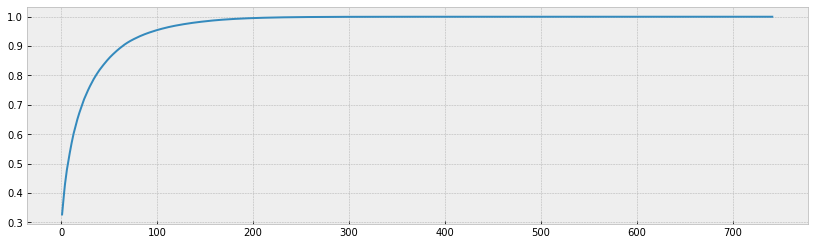

In [21]:
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,742), pca.explained_variance_ratio_.cumsum())
plt.show()

In [23]:
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = X.shape[1] - n_over_95

print(f"Number features: {n_to_reach_95}\tTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

Number features: 95	Total Variance Explained: 0.9506343733724926


In [24]:
pca = PCA(n_components=n_to_reach_95)

X_pca_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_.cumsum()[-1]

0.9493049591721945

## Support Vector Machine Modeling

In [26]:
from sklearn import svm

# Instantiating the classifier
clf = svm.SVC(gamma='auto')

# Fitting the model
%timeit clf.fit(X_pca_train, y_train)

# Getting predictions for the training set
svm_train_preds = clf.predict(X_pca_train)

# Getting predictions for the testing set
X_pca_test = pca.transform(X_test)
svm_test_preds = clf.predict(X_pca_test)

# Scores for both predictions
svm_train_score = accuracy_score(y_train, svm_train_preds)
svm_test_score = accuracy_score(y_test, svm_test_preds)

# Printing Results
print("Support Vector Machine")
print(f"Training Accuracy: {svm_train_score} \t\t Testing Accuracy: {svm_test_score}")

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

4min 30s ± 7.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


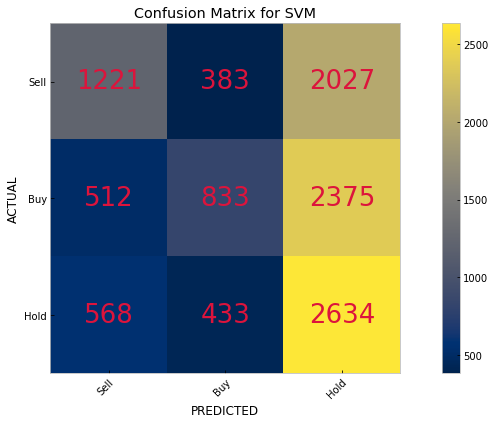

In [32]:
plot_confusion_matrix(y_test, svm_test_preds, title="Confusion Matrix for SVM")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

In [ ]:
# Support Vector Machine
# Training Accuracy: 0.4456884519691729 		 Testing Accuracy: 0.4267249226288003